<a href="https://colab.research.google.com/github/epjonnadula/Deep-Learning/blob/master/TestRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
import seaborn as sns
import ipywidgets as widgets

In [0]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
x=bos.RM
y=boston.target
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)
x=x/np.mean(x)
y=y/np.mean(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3,shuffle=True)
m=np.shape(train_x)[0]
train_x=np.nan_to_num(train_x)
train_y=np.nan_to_num(train_y)
ones=np.ones((m,1))
train_x=np.append(ones,train_x,axis=1)
n=np.shape(train_x)[1]

In [3]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
def hypothesis(theta,x):
    return np.matmul(x,theta)

In [0]:
def cost(calculated,actual):
    diff=np.subtract(calculated,actual)
    val=np.matmul(np.transpose(diff),diff)[0][0]
    val=val/(2*m)
    return val

In [0]:
def gradient_descent(calculated,actual,x,alpha,theta):
    diff=np.subtract(calculated,actual)
    grad=np.matmul(np.transpose(diff),x)
    grads=alpha*(np.transpose(grad)/np.shape(x)[0])
    theta=np.subtract(theta,grads)
    return theta

In [7]:
#@title ## Epsilon
#@markdown Run and play with the slider to select the Epsilon.
epsilon_slider=widgets.FloatLogSlider(
    base=10,
    min=-8, 
    max=-1, 
    step=1,
    description='Epsilon Value'
)
display(epsilon_slider)

FloatLogSlider(value=0.1, description='Epsilon Value', max=-1.0, min=-8.0, step=1.0)

In [8]:
#@title ## Learning Rate
#@markdown Run and play with the slider to select the learning rate.
alpha_slider=widgets.FloatLogSlider(
    base=10,
    min=-4, 
    max=-1, 
    step=1,
    description='Alpha Value'
)
display(alpha_slider)

FloatLogSlider(value=0.1, description='Alpha Value', max=-1.0, min=-4.0, step=1.0)

In [9]:
prev_cost=sys.maxsize
cost_list=[]
epsilon=epsilon_slider.value
theta=np.zeros((n,1))
theta[-1]=1
while True:
    calculated=hypothesis(theta,train_x)
    cost_val=cost(calculated,train_y)
    theta=gradient_descent(calculated,train_y,train_x,alpha_slider.value,theta)
    cost_list.append(cost_val)
    if np.abs(cost_val-prev_cost)<=epsilon:
        break
    else:
        prev_cost=cost_val
    if len(cost_list)%10000==0:
        print("Iteration ",len(cost_list), "---> Cost ",cost_list[-1])

Iteration  10000 ---> Cost  0.055297490036255295
Iteration  20000 ---> Cost  0.053996388232578
Iteration  30000 ---> Cost  0.052853169106229246
Iteration  40000 ---> Cost  0.05184867432560883
Iteration  50000 ---> Cost  0.05096607033391711
Iteration  60000 ---> Cost  0.05019056624850122
Iteration  70000 ---> Cost  0.04950916599180843
Iteration  80000 ---> Cost  0.04891045050010092
Iteration  90000 ---> Cost  0.04838438636013378
Iteration  100000 ---> Cost  0.04792215766688552
Iteration  110000 ---> Cost  0.04751601828457493
Iteration  120000 ---> Cost  0.047159162035118794
Iteration  130000 ---> Cost  0.04684560863861867
Iteration  140000 ---> Cost  0.04657010349444213
Iteration  150000 ---> Cost  0.046328029623404585
Iteration  160000 ---> Cost  0.04611533029536027
Iteration  170000 ---> Cost  0.045928441045576314
Iteration  180000 ---> Cost  0.04576422994060505
Iteration  190000 ---> Cost  0.045619945092615834
Iteration  200000 ---> Cost  0.04549316854261997
Iteration  210000 ---> Co

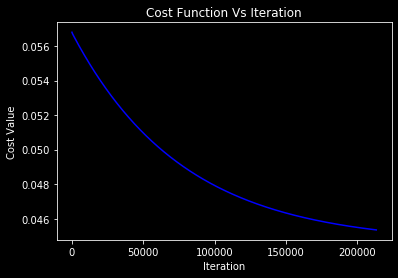

Training Cost= 0.045348197154717024


In [10]:
plt.style.use('dark_background')
plt.plot(range(0,len(cost_list)),cost_list,color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.title('Cost Function Vs Iteration')
plt.show()
print("Training Cost=",cost_list[-1])

In [0]:
m=np.shape(test_x)[0]
test_x=np.nan_to_num(test_x)
test_y=np.nan_to_num(test_y)
ones=np.ones((m,1))
test_x=np.append(ones,test_x,axis=1)
n=np.shape(test_x)[1]

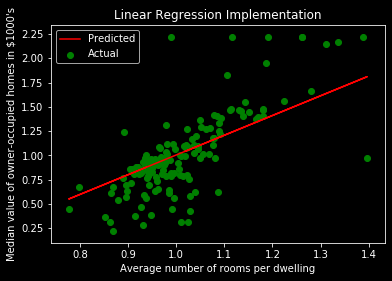

Testing Cost= 0.042731664987036296


In [12]:
calculated=hypothesis(theta,test_x)
plt.style.use('dark_background')
plt.plot(test_x[:,-1],calculated,color='red')
plt.scatter(test_x[:,-1],test_y,color='green')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.legend(['Predicted', 'Actual'], loc='upper left')
plt.title('Linear Regression Implementation')
plt.show()
cost_val=cost(calculated,test_y)
print("Testing Cost=",cost_val)

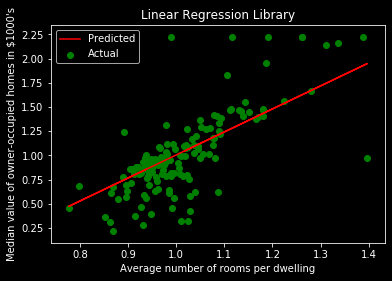

Testing Cost 0.039712049932454356


In [13]:
reg = LinearRegression()
reg.fit(train_x, train_y)
predict_y = reg.predict(test_x)
plt.style.use('dark_background')
plt.plot(test_x[:,-1],predict_y,color='red')
plt.scatter(test_x[:,-1],test_y,color='green')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.legend(['Predicted', 'Actual'], loc='upper left')
plt.title('Linear Regression Library')
plt.show()
print("Testing Cost",cost(predict_y,test_y))